In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

In [2]:
#import keras;
#print(keras.__version__)

In [3]:
from __future__ import absolute_import
from __future__ import print_function
import os

os.environ['KERAS_BACKEND'] = 'theano'
#os.environ['THEANO_FLAGS']='mode=FAST_RUN,device=gpu0,floatX=float32,optimizer=None'

import keras.models as models
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape, Permute
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint

from keras import backend as K

import cv2
import numpy as np
import json
np.random.seed(7) # 0bserver07 for reproducibility

Using Theano backend.


In [4]:
K.set_image_data_format('channels_first')
K.image_data_format()

'channels_first'

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data_shape = 360*480

class_weighting= [0.2595, 0.1826, 4.5640, 0.1417, 0.5051, 0.3826, 9.6446, 1.8418, 6.6823, 6.2478, 3.0, 7.3614]

# load the model:
with open('segNet_basic_model.json') as model_file:
    segnet_basic = models.model_from_json(model_file.read())

In [9]:
# load weights
segnet_basic.load_weights("weights/model_weight_1.hdf5")

# Compile model (required to make predictions)
segnet_basic.compile(loss="categorical_crossentropy", optimizer='adadelta', metrics=["accuracy"])

In [10]:
data_shape = 360*480
class_weighting= [0.2595, 0.1826, 4.5640, 0.1417, 0.5051, 0.3826, 9.6446, 1.8418, 6.6823, 6.2478, 3.0, 7.3614]

val_data = np.load('./data/val_data.npy')
val_label = np.load('./data/val_label.npy')

In [11]:
batch_size = 6

# estimate accuracy on whole dataset using loaded weights
scores = segnet_basic.evaluate(val_data, val_label, verbose=0, batch_size=batch_size)
print("%s: %.2f%%" % (segnet_basic.metrics_names[1], scores[1]*100))

acc: 14.27%


In [12]:

Sky = [128,128,128]
Building = [128,0,0]
Pole = [192,192,128]
Road_marking = [255,69,0]
Road = [128,64,128]
Pavement = [60,40,222]
Tree = [128,128,0]
SignSymbol = [192,128,128]
Fence = [64,64,128]
Car = [64,0,128]
Pedestrian = [64,64,0]
Bicyclist = [0,128,192]
Unlabelled = [0,0,0]

label_colours = np.array([Sky, Building, Pole, Road, Pavement,
                          Tree, SignSymbol, Fence, Car, Pedestrian, Bicyclist, Unlabelled])

def visualize(temp, plot=True):
    r = temp.copy()
    g = temp.copy()
    b = temp.copy()
    for l in range(0,11):
        r[temp==l]=label_colours[l,0]
        g[temp==l]=label_colours[l,1]
        b[temp==l]=label_colours[l,2]

    rgb = np.zeros((temp.shape[0], temp.shape[1], 3))
    rgb[:,:,0] = (r/255.0)#[:,:,0]
    rgb[:,:,1] = (g/255.0)#[:,:,1]
    rgb[:,:,2] = (b/255.0)#[:,:,2]
    if plot:
        plt.imshow(rgb)
    else:
        return rgb



# load the data
train_data = np.load('./data/train_data.npy')



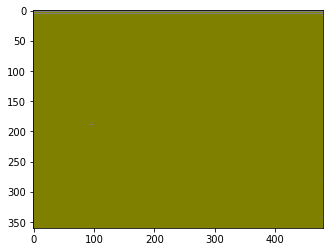

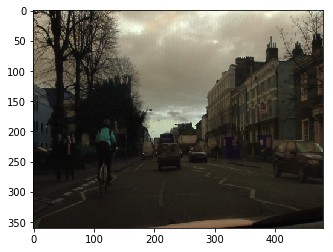

In [13]:

import os
DataPath = './CamVid/'

gt = []
with open(DataPath+'train.txt') as f:
    txt = f.readlines()
    txt = [line.split(' ') for line in txt]
for i in range(len(txt)):
    gt.append(cv2.imread(os.getcwd() + txt[i][0][7:]))


output = segnet_basic.predict_proba(train_data[23:24])
pred = visualize(np.argmax(output[0],axis=1).reshape((360,480)), False)
plt.imshow(pred)
plt.figure(2)
plt.imshow(gt[23])

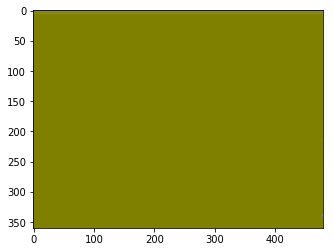

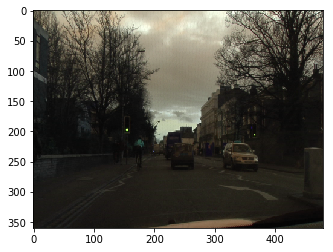

In [14]:
output = segnet_basic.predict_proba(train_data[20:21])
pred = visualize(np.argmax(output[0],axis=1).reshape((360,480)), False)
plt.imshow(pred)
plt.figure(2)
plt.imshow(gt[20])

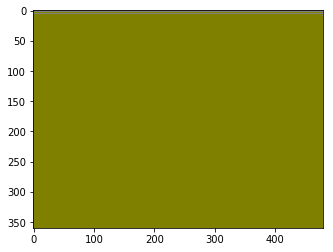

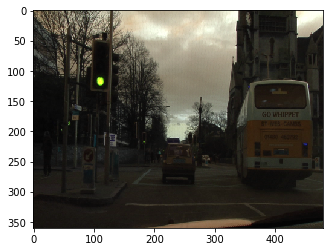

In [15]:
output = segnet_basic.predict_proba(train_data[10:11])
pred = visualize(np.argmax(output[0],axis=1).reshape((360,480)), False)
plt.imshow(pred)
plt.figure(2)
plt.imshow(gt[10])